<a href="https://colab.research.google.com/github/SFaegheh/Simple-Codes-DL/blob/main/CIFAR10_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [75]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


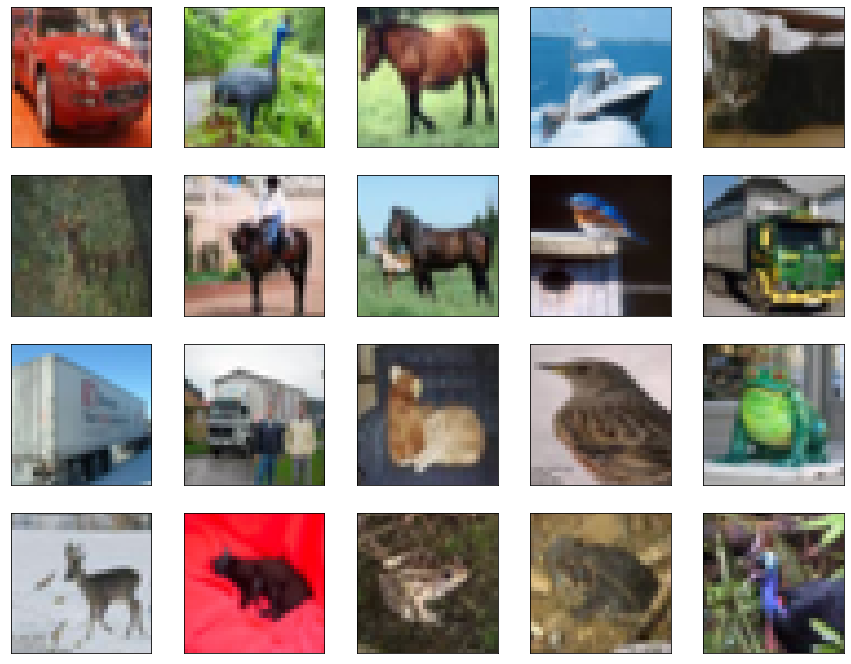

In [77]:
plt.figure(figsize=(15,15))

for i in range(5,25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    pass
plt.show()

In [78]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.array(x_train)
x_test = np.array(x_test)

In [79]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [80]:
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [81]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [83]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [84]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)              

In [85]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer= opt_rms ,
              metrics=['accuracy'])

In [86]:
history = model.fit(x_train, y_train,
          epochs=25, batch_size=64, validation_data = (x_test, y_test))

Epoch 1/25
782/782 [==============================] - 5s 6ms/step - loss: 1.9702 - accuracy: 0.2665 - val_loss: 1.6387 - val_accuracy: 0.4057
Epoch 2/25
782/782 [==============================] - 4s 5ms/step - loss: 1.5166 - accuracy: 0.4503 - val_loss: 1.3236 - val_accuracy: 0.5316
Epoch 3/25
782/782 [==============================] - 4s 5ms/step - loss: 1.3586 - accuracy: 0.5141 - val_loss: 1.1441 - val_accuracy: 0.5925
Epoch 4/25
782/782 [==============================] - 4s 5ms/step - loss: 1.2449 - accuracy: 0.5590 - val_loss: 1.1888 - val_accuracy: 0.5895
Epoch 5/25
782/782 [==============================] - 4s 5ms/step - loss: 1.1850 - accuracy: 0.5869 - val_loss: 1.1617 - val_accuracy: 0.5947
Epoch 6/25
782/782 [==============================] - 4s 5ms/step - loss: 1.1261 - accuracy: 0.6085 - val_loss: 0.9904 - val_accuracy: 0.6560
Epoch 7/25
782/782 [==============================] - 4s 5ms/step - loss: 1.0676 - accuracy: 0.6298 - val_loss: 1.0269 - val_accuracy: 0.6382
Epoch 

In [87]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.9212 - accuracy: 0.6935

Testing loss: 0.92, acc: 0.69%


In [88]:
predictions = model.predict(x_test)

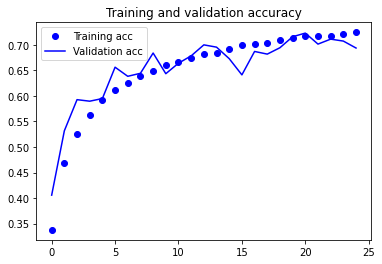

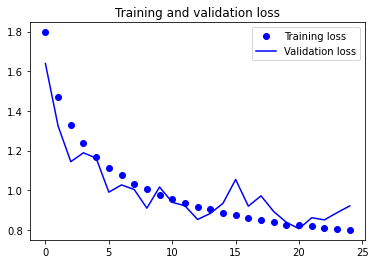

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()